<a href="https://colab.research.google.com/github/Roshikaa/Roshikaa/blob/main/1940270_Lab1_Solving_by_Simplex_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**29-07-2021**

In [1]:
!pip install pulp

     |████████████████████████████████| 40.6 MB 32 kB/s 


**PROBLEM - 1**


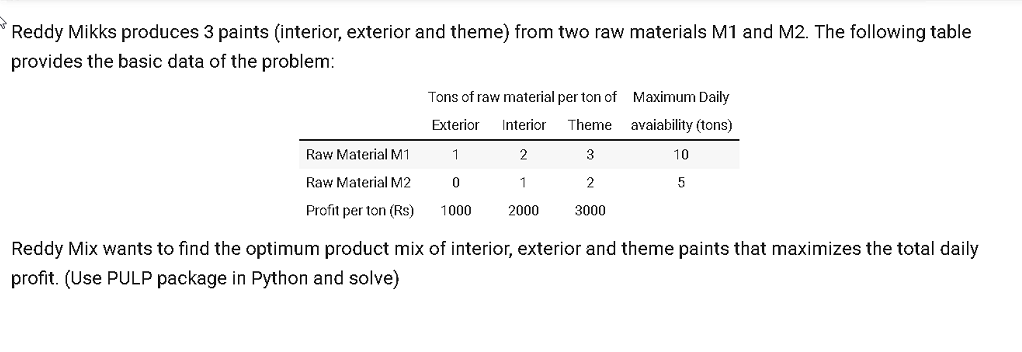

In [2]:
from pulp import *
paints = ["Exterior Paint", "Interior Paint", "Theme Paint"]
profit = {"Exterior Paint":1000, "Interior Paint":2000, "Theme Paint":3000}
Raw_Material_M1 = {"Exterior Paint":1, "Interior Paint":2, "Theme Paint":3}
Raw_Material_M2 = {"Exterior Paint":0, "Interior Paint":1, "Theme Paint":2}
prob = LpProblem("problem1", LpMaximize)
paint_vars = LpVariable.dicts("paint", paints, lowBound = 0, upBound = None, cat = "Continuous")
prob += lpSum([profit[i]*paint_vars[i] for i in paints]), "Total profit of the paint per ton"
prob += lpSum([Raw_Material_M1[i]*paint_vars[i] for i in paints]) <= 10, "Raw Material M1"
prob += lpSum([Raw_Material_M2[i]*paint_vars[i] for i in paints]) <= 5, "RAw Material M2"
prob.writeLP("problem1.lp")
prob.solve()
print("\n", "Status:",LpStatus[prob.status],"\n")
for v in prob.variables():
  print("\t", v.name, "=", v.varValue, "tons", "\n")
print("Maximum Daily Profit =", "Rs." , value(prob.objective)*1000)





 Status: Optimal 

	 paint_Exterior_Paint = 2.5 tons 

	 paint_Interior_Paint = 0.0 tons 

	 paint_Theme_Paint = 2.5 tons 

Maximum Daily Profit = Rs. 10000000.0


**30-07-2021**

**PROBLEM - 2**

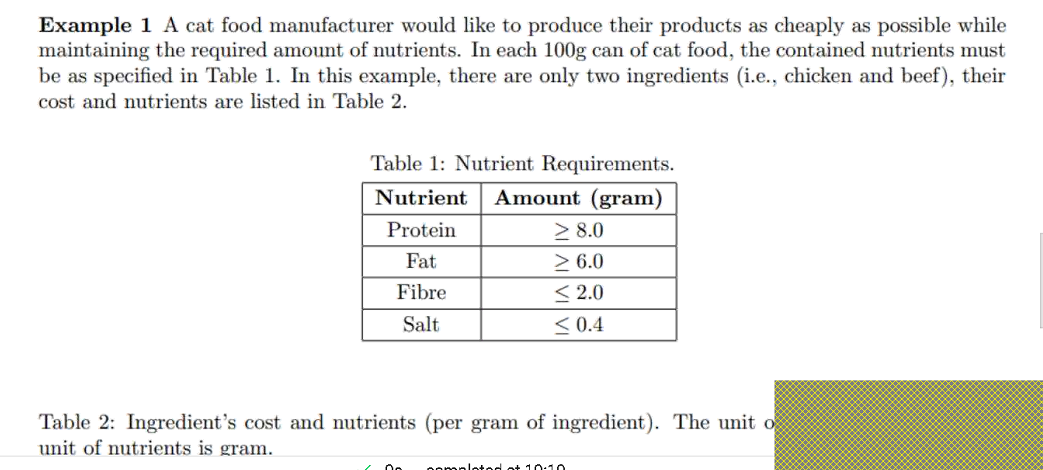

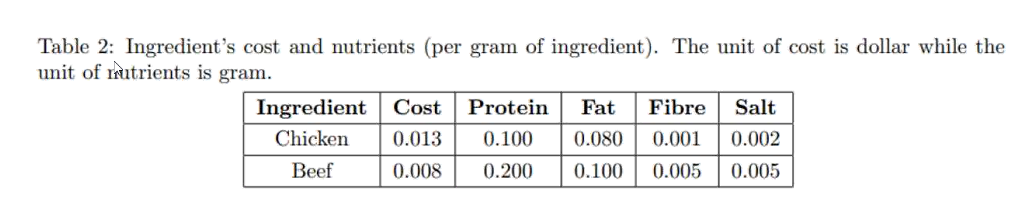

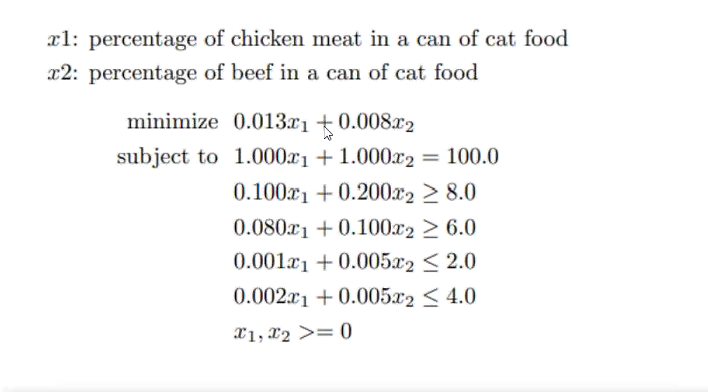

In [4]:
from pulp import *
prob = LpProblem("The Whiskas Problem", LpMinimize)
x1 = LpVariable("ChickenPercent", lowBound = 0, upBound = None, cat = "Continuous")
x2 = LpVariable("BeefPercent", lowBound = 0, upBound = None, cat = "Continuous")
prob += 0.013*x1 + 0.008*x2
prob += x1 + x2 == 100
prob += 0.100*x1 + 0.200*x2 >= 8.0
prob += 0.080*x1 + 0.100*x2 >= 6.0
prob += 0.001*x1 + 0.005*x2 <= 2.0
prob += 0.002*x1 + 0.005*x2 <= 0.4
prob.writeLP("FoodModel1.lp")
prob.solve()
print("\n", "Status:", LpStatus[prob.status], "\n")
for v in prob.variables():
  print("\t", v.name, "=", v.varValue, "\n")
print("Total Cost of Ingredients per can = ", value(prob.objective))


 Status: Optimal 

	 BeefPercent = 66.666667 

	 ChickenPercent = 33.333333 

Total Cost of Ingredients per can =  0.966666665


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


**PROBLEM - 3**

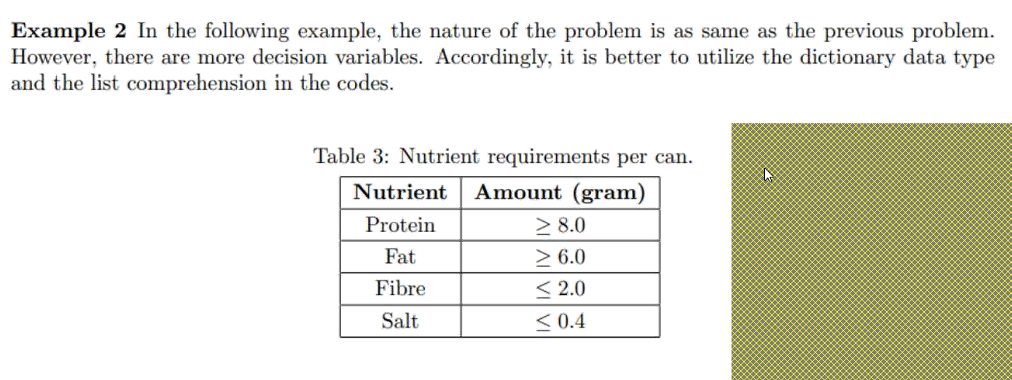

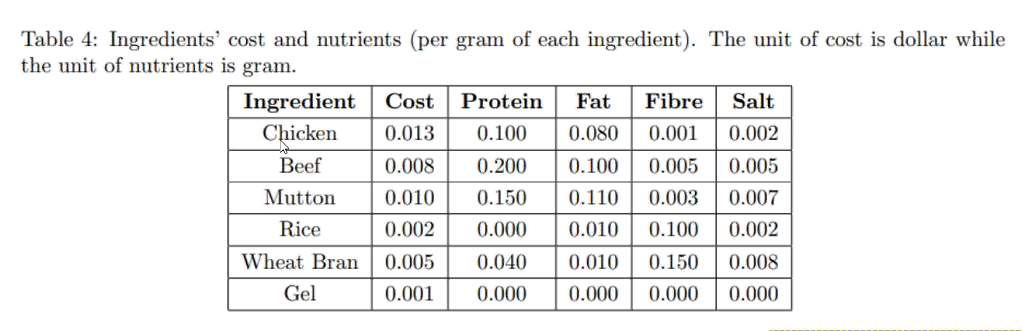

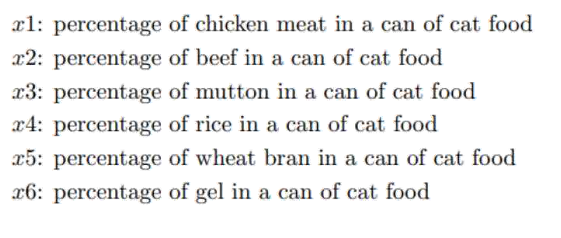

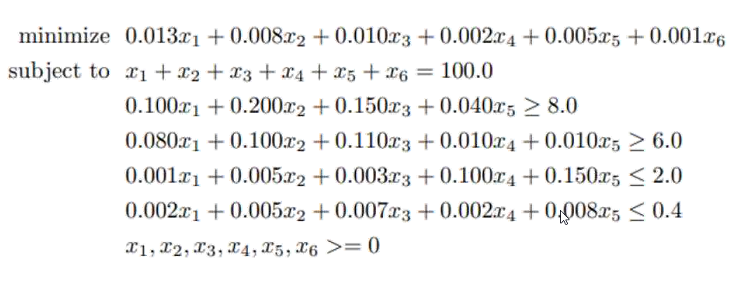

In [7]:
from pulp import *
Ingredients = ['CHICKEN', 'BEEF', 'MUTTON', 'RICE', 'WHEAT', 'GEL']

# A dictionary of the costs of each of the Ingredients is created
costs = {'CHICKEN': 0.013, 
         'BEEF': 0.008, 
         'MUTTON': 0.010, 
         'RICE': 0.002, 
         'WHEAT': 0.005, 
         'GEL': 0.001}

# A dictionary of the protein percent in each of the Ingredients is created
proteinPercent = {'CHICKEN': 0.100, 
                  'BEEF': 0.200, 
                  'MUTTON': 0.150, 
                  'RICE': 0.000, 
                  'WHEAT': 0.040, 
                  'GEL': 0.000}

# A dictionary of the fat percent in each of the Ingredients is created
fatPercent = {'CHICKEN': 0.080, 
              'BEEF': 0.100, 
              'MUTTON': 0.110, 
              'RICE': 0.010, 
              'WHEAT': 0.010, 
              'GEL': 0.000}

# A dictionary of the fibre percent in each of the Ingredients is created
fibrePercent = {'CHICKEN': 0.001, 
                'BEEF': 0.005, 
                'MUTTON': 0.003, 
                'RICE': 0.100, 
                'WHEAT': 0.150, 
                'GEL': 0.000}

# A dictionary of the salt percent in each of the Ingredients is created
saltPercent = {'CHICKEN': 0.002, 
               'BEEF': 0.005, 
               'MUTTON': 0.007, 
               'RICE': 0.002, 
               'WHEAT': 0.008, 
               'GEL': 0.000}

prob = LpProblem("The Whiskas Problem", LpMinimize)

ingredient_vars = LpVariable.dicts("Ingr",Ingredients,0)
prob += lpSum([costs[i]*ingredient_vars[i] for i in Ingredients]), "Total Cost of Ingredients per can"
prob += lpSum([ingredient_vars[i] for i in Ingredients]) == 100, "PercentagesSum"
prob += lpSum([proteinPercent[i] * ingredient_vars[i] for i in Ingredients]) >= 8.0, "ProteinRequirement"
prob += lpSum([fatPercent[i] * ingredient_vars[i] for i in Ingredients]) >= 6.0, "FatRequirement"
prob += lpSum([fibrePercent[i] * ingredient_vars[i] for i in Ingredients]) <= 2.0, "FibreRequirement"
prob += lpSum([saltPercent[i] * ingredient_vars[i] for i in Ingredients]) <= 0.4, "SaltRequirement"
prob.writeLP("FoodModel2.lp")
prob.solve()
print("\n", "Status:", LpStatus[prob.status], "\n")
for v in prob.variables():
  print("\t", v.name, "=", v.varValue, "\n")
print("Total Cost of Ingredients per can = ", value(prob.objective))


 Status: Optimal 

	 Ingr_BEEF = 60.0 

	 Ingr_CHICKEN = 0.0 

	 Ingr_GEL = 40.0 

	 Ingr_MUTTON = 0.0 

	 Ingr_RICE = 0.0 

	 Ingr_WHEAT = 0.0 

Total Cost of Ingredients per can =  0.52


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


The optimal solution is 60% Beef and 40% Gel leading to a objective Function value of 52 cents per can.